In [1]:
import numpy as np
import spacy
from umap import UMAP
import torch
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load('en_core_web_lg', disable=['tok2vec','tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])

In [8]:
new_vocab_str2 = []
vocab_vecs = []
vector_keys = list(nlp.vocab.vectors.keys())
vector_keys_idx = {vector_keys[i]:i for i in range(len(vector_keys))}
idx_tokens = {i:nlp.vocab.strings[vector_keys[i]] for i in range(len(vector_keys))}
tokens_idx = {v:k for k,v in idx_tokens.items()}
for i in range(len(vector_keys)):
    try:
        t = nlp.vocab.strings[vector_keys[i]]
        new_vocab_str2.append(t)
        # vocab_vecs.append(torch.tensor(nlp.vocab.vectors[t]))
    except:
        continue
# embeddings = torch.vstack(vocab_vecs)
# embeddings.shape

In [9]:
new_vocab_str2[1520]

'lived'

In [3]:
new_vocab_str = []
vocab_vecs = []
vector_keys = list(nlp.vocab.vectors.keys())
vector_keys_idx = {vector_keys[i]:i for i in range(len(vector_keys))}
idx_tokens = {i:nlp.vocab.strings[vector_keys[i]] for i in range(len(vector_keys))}
tokens_idx = {v:k for k,v in idx_tokens.items()}
for i in range(len(vector_keys)):
    try:
        t = nlp.vocab.strings[vector_keys[i]]
        new_vocab_str.append(t)
        vocab_vecs.append(torch.tensor(nlp.vocab.vectors[t]))
    except:
        continue
embeddings = torch.vstack(vocab_vecs)
embeddings.shape

torch.Size([514157, 300])

In [5]:
new_vocab_str[1520]

'lived'

In [5]:
%%time
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

reducer = UMAP(n_neighbors=15, n_components=64, min_dist=0.1, metric='euclidean', random_state=42, verbose=True)
embeddings64 = reducer.fit_transform(embeddings_scaled)
embeddings64.shape

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(n_components=64, random_state=42, verbose=True)
Sun Nov 17 23:47:50 2024 Construct fuzzy simplicial set
Sun Nov 17 23:47:51 2024 Finding Nearest Neighbors
Sun Nov 17 23:47:51 2024 Building RP forest with 41 trees
Sun Nov 17 23:50:12 2024 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	 3  /  19
	 4  /  19
	 5  /  19
	 6  /  19
	Stopping threshold met -- exiting after 6 iterations
Sun Nov 17 23:51:35 2024 Finished Nearest Neighbor Search
Sun Nov 17 23:52:18 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Nov 18 01:08:56 2024 Finished embedding
CPU times: total: 4h 24min 6s
Wall time: 1h 21min 23s


(514157, 64)

In [13]:
with open(r'data\ReducedEmbeddings\spacy_lg_reduced_embeddings_64.npy', 'wb') as f:
    np.save(f, embeddings64, False)

In [20]:
with open(r'data\ReducedEmbeddings\spacy_lg_reduced_embeddings_64.npy', 'rb') as f:
    embeddings64 = np.load(f, allow_pickle=False)

In [42]:
%%time
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

reducer = UMAP(n_neighbors=15, n_components=128, min_dist=0.1, metric='euclidean', random_state=42, verbose=True)
embeddings128 = reducer.fit_transform(embeddings_scaled)
embeddings128.shape

In [36]:
with open(r'data\ReducedEmbeddings\spacy_lg_reduced_embeddings_1282.npy', 'wb') as f:
    np.save(f, embeddings128, False)

In [43]:
with open(r'data\ReducedEmbeddings\spacy_lg_reduced_embeddings_128.npy', 'rb') as f:
    embeddings128 = np.load(f, allow_pickle=False)

In [23]:
extra_tokens = {
    'g': ['good', 'bad', 'nice', 'evil', 'pleasant', 'awful', 'love', 'wicked'],
    'b': ['king', 'queen', 'prince', 'princess', 'crown', 'sovereign', 'duke'],
    'y': ['car', 'traffic', 'bicycle', 'bus', 'train', 'truck', 'motorcycle', 'lane', 'highway'],
    'r': ['basketball', 'ball', 'soccer', 'tennis', 'cricket', 'football', 'golf', 'baseball']
}

target_tokens = []
color_codes = []
for color, tokens in extra_tokens.items():
    for token in tokens:
        target_tokens.append(token)
        color_codes.append(color)

idx = [tokens_idx[t] for t in target_tokens]

In [24]:
all_vocab = [idx_tokens[i] for i in range(len(idx_tokens))]

In [26]:
embeddings[idx]
embeddings64[idx]
embeddings128[idx]
target_vocab = [all_vocab[i] for i in idx]

In [30]:
tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=1, n_iter=300, metric='cosine')

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


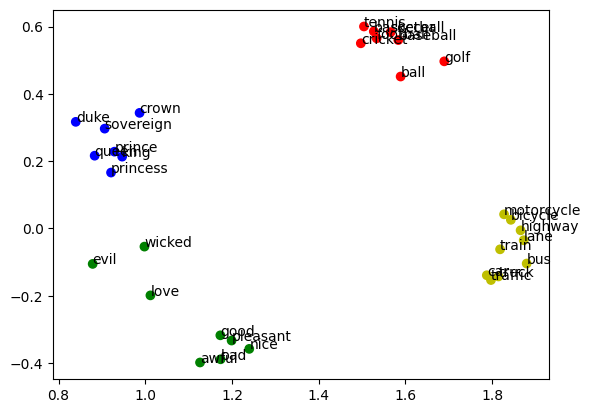

In [31]:
X_tsne = tsne.fit_transform(embeddings[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


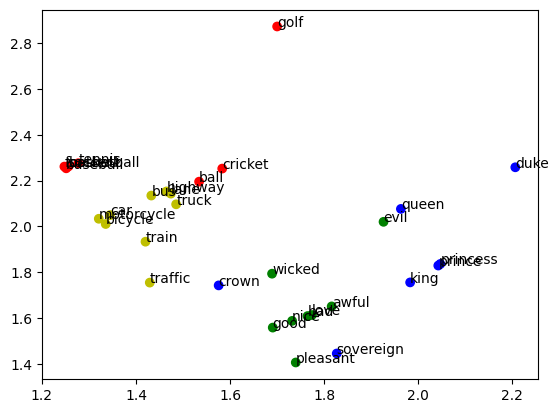

In [44]:
X_tsne = tsne.fit_transform(embeddings128[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


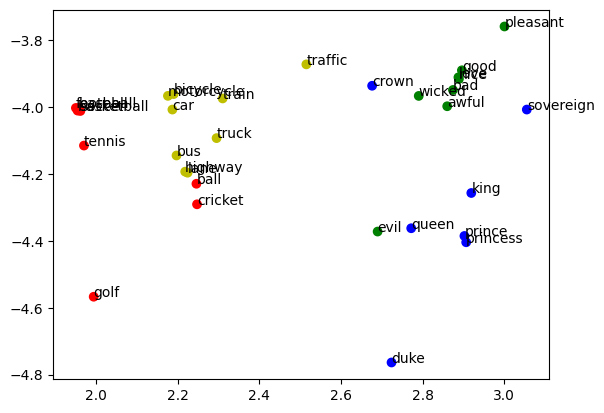

In [19]:
X_tsne = tsne.fit_transform(embeddings64[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

c:\Users\fardin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


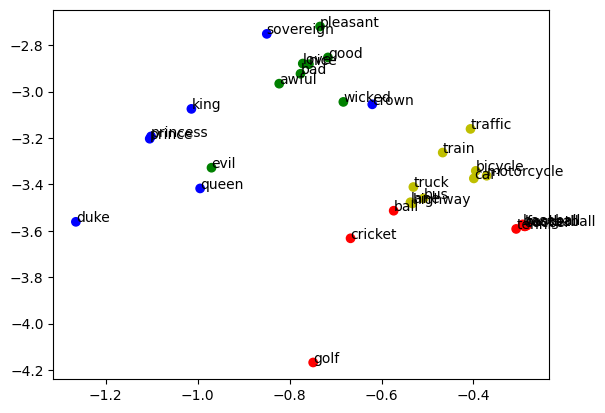

In [37]:
X_tsne = tsne.fit_transform(embeddings128[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()